# NLP Playground 

The following concepts have been explored in the notebook to produce the results presented here. 

Exploring data cleaning techniques (removing punctuation, tokenize, lemmatize, stemming, stop words,   )

Create dictionary of the most frequent words using Gensim library, spacy library

apply Recommender system

use of Bag of words (unigram, bigram, …) 

Explore different models (random forest, gradient boost, Naïve Bayes) with vectorized data made with count vectorizer, TFIDF , 

Exploring similarity between review 

Classification with kmean clustering 


## downloard all the libraries

In [4]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

import pickle 
#import mglearn
import time

from nltk.tokenize import TweetTokenizer # doesn't split at apostrophes
import nltk
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mirei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mirei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mirei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mirei\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## import dataset 

In [5]:
df = pd.read_csv('netflix_titles/netflix_titles.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [6]:
df.shape

(8807, 12)

In [7]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<AxesSubplot:xlabel='type', ylabel='count'>

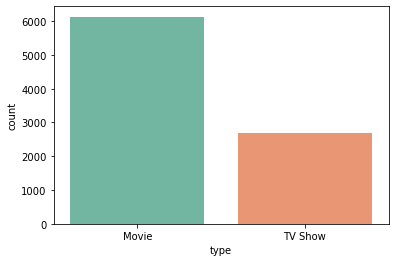

In [11]:
sns.countplot(x="type", data=df, palette="Set2")

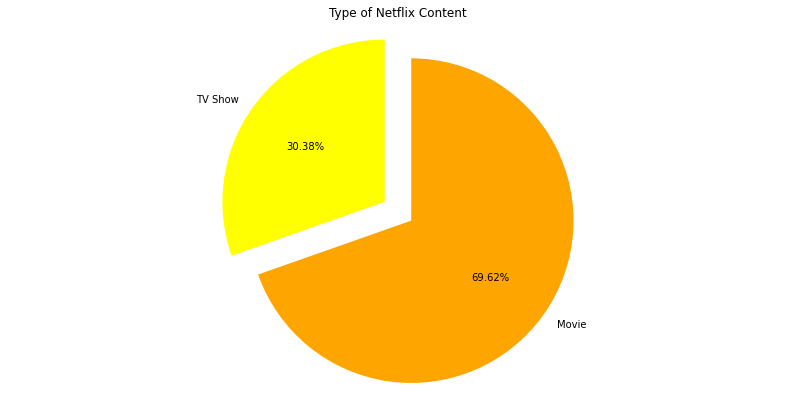

In [12]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['yellow','orange'], startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

#### TV_Show Update in NETFLIX

If a producer wants to release some content, which month must he do so?( Month when least amount of content is added)

In [13]:
netflix_shows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

In [14]:
netflix_shows.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [15]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
netflix_date.head(3)

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September


In [16]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
month_order

['December',
 'November',
 'October',
 'September',
 'August',
 'July',
 'June',
 'May',
 'April',
 'March',
 'February',
 'January']

In [17]:
dfs = netflix_date.groupby('year')['month'].value_counts() # count the number of added each month per year 
dfs.head(5)

year  month    
2008  February     1
2013  October      2
      August       1
      March        1
      September    1
Name: month, dtype: int64

In [18]:
netflix_date.groupby('year')['month'].value_counts().unstack().head(2)

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2008,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,1.0


In [19]:
netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0).T.head(2) # not in order 

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0


In [20]:
netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T.head(2) # get verything in order

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,38.0,61.0,47.0,68.0,0.0
November,0.0,0.0,2.0,2.0,18.0,30.0,36.0,68.0,51.0,0.0


In [21]:
dfs = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
dfs.head(2)

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,38.0,61.0,47.0,68.0,0.0
November,0.0,0.0,2.0,2.0,18.0,30.0,36.0,68.0,51.0,0.0


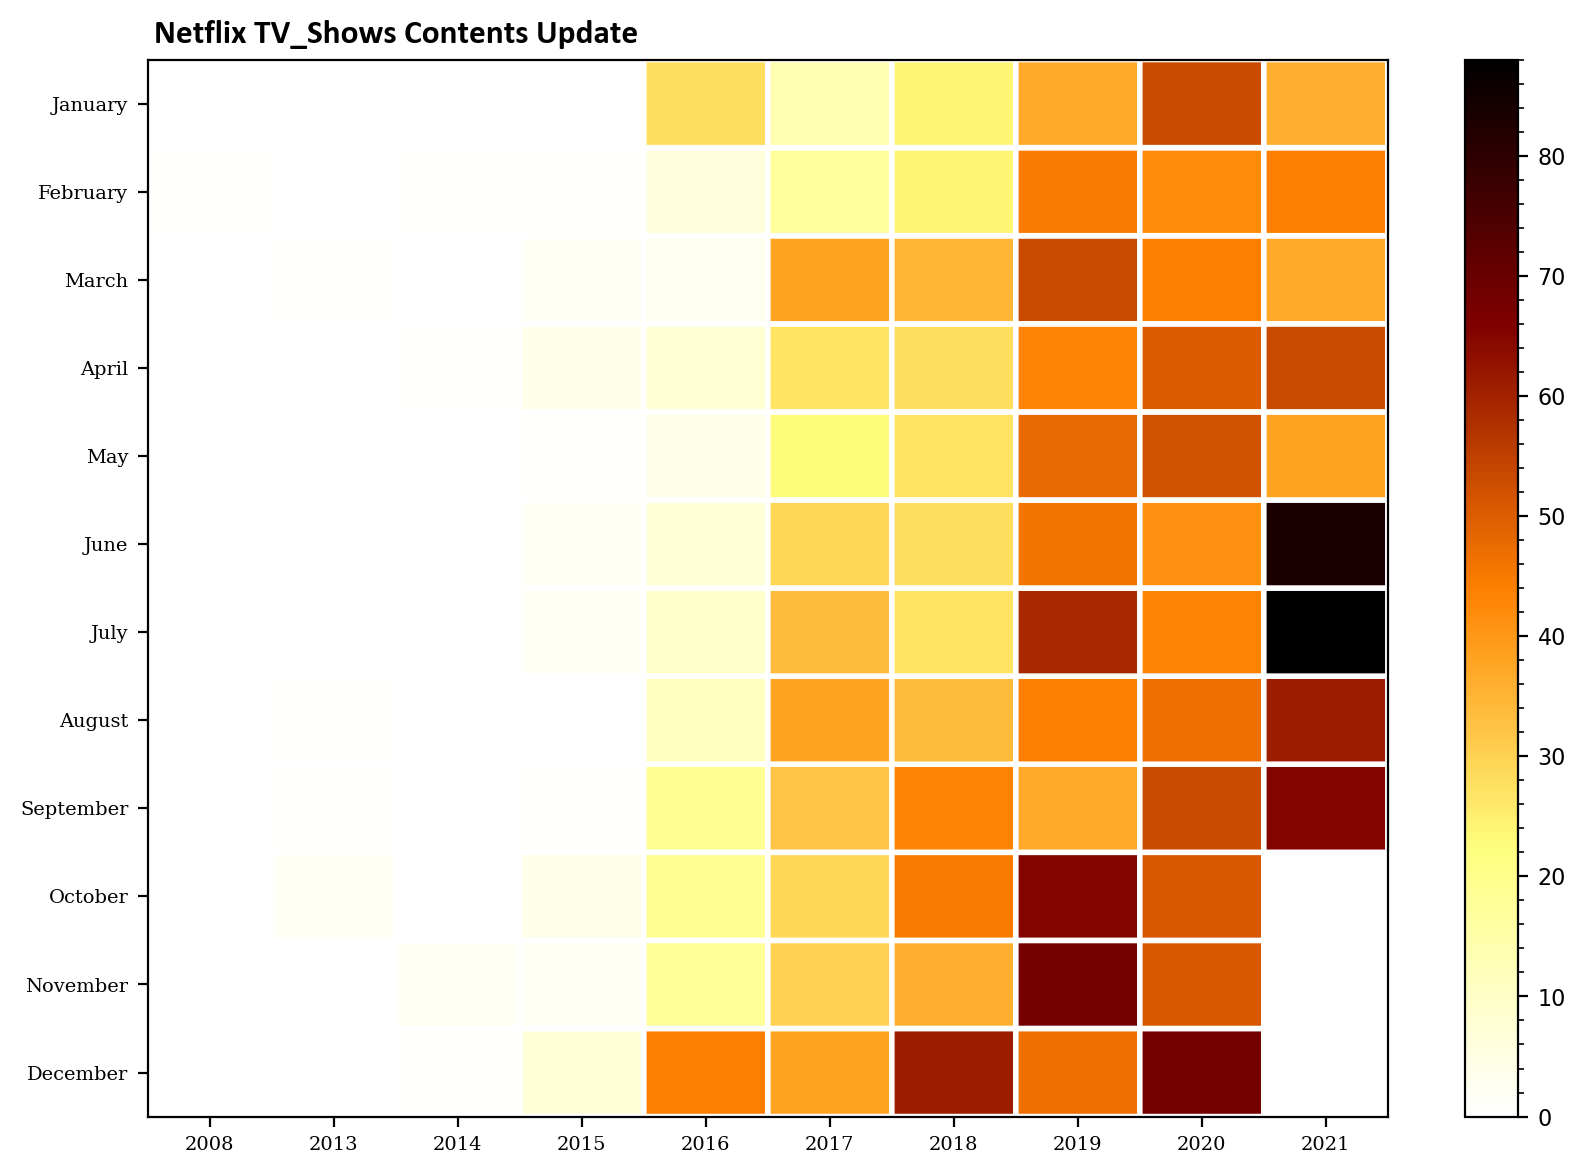

In [22]:
# ploting the data 
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(dfs, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(dfs.columns), 1), dfs.columns, fontsize=7, fontfamily='serif') # sticks pf heatmap
plt.yticks(np.arange(0.5, len(dfs.index), 1), dfs.index, fontsize=7, fontfamily='serif')  # yticks of heatmp

plt.title('Netflix TV_Shows Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

#### Movie update in NETflix

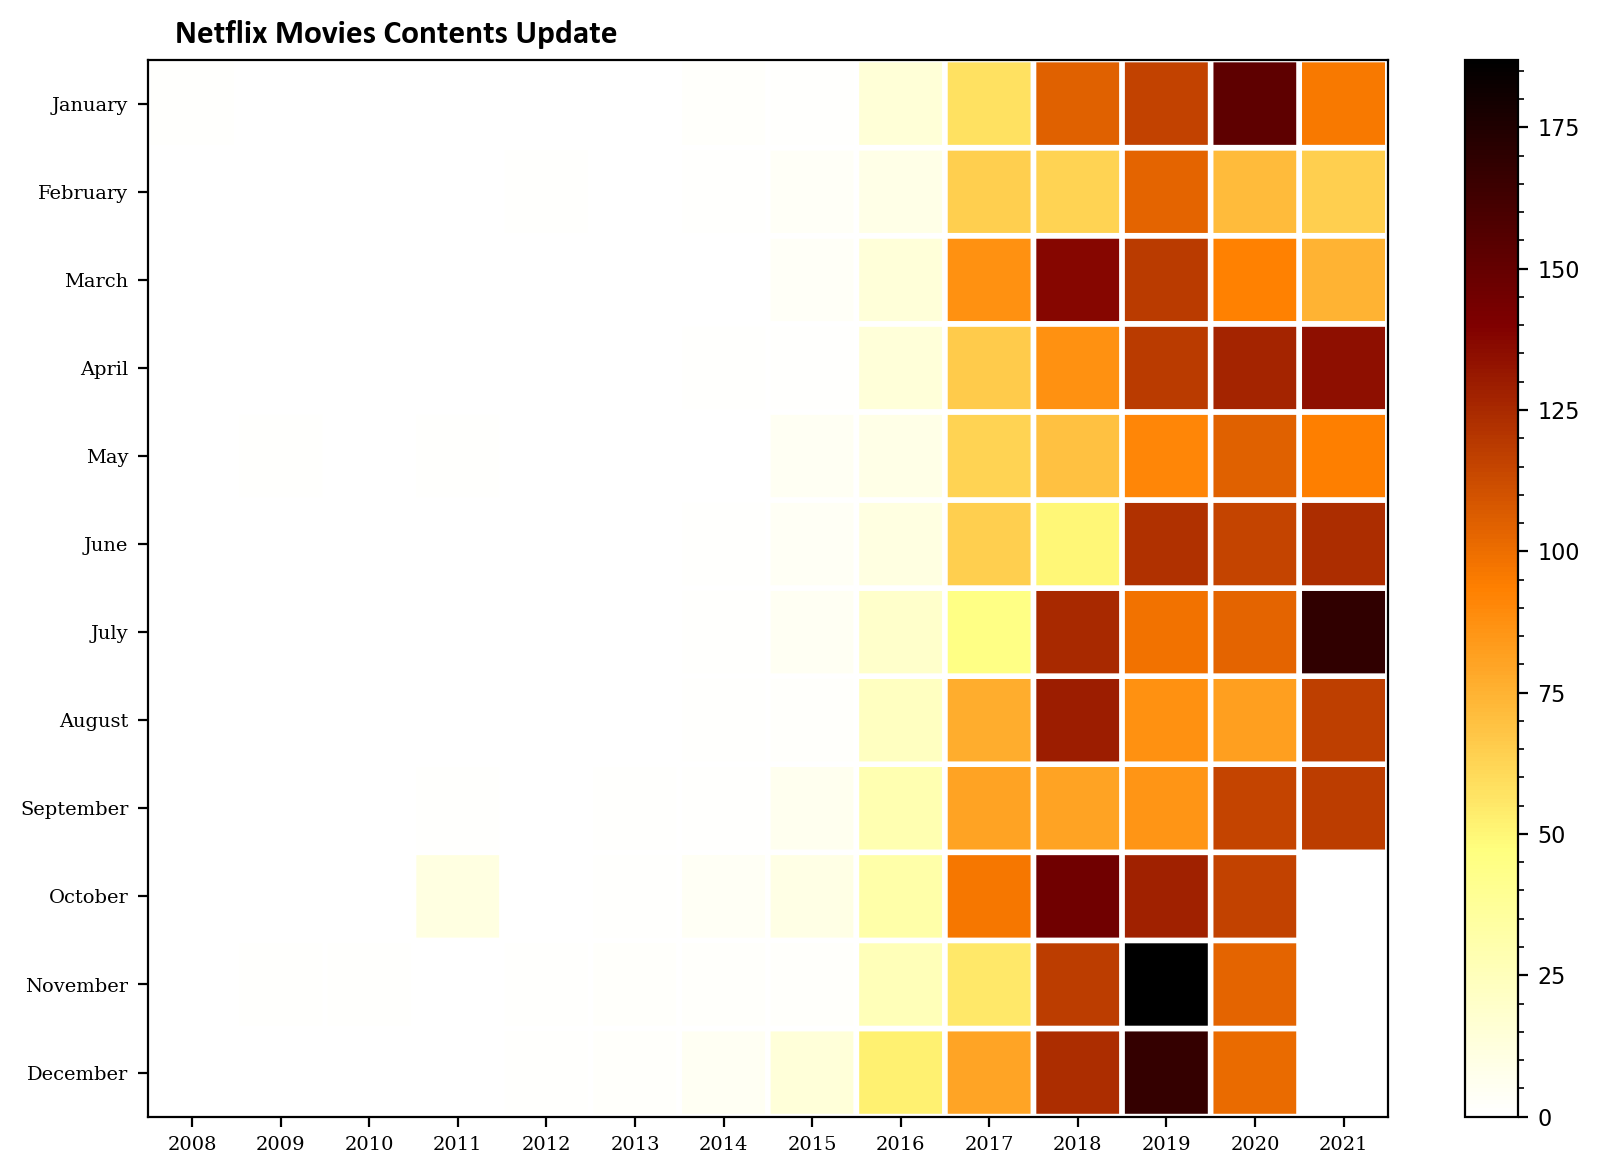

In [23]:

netflix_date = netflix_movies[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
dff = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(dff, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(dff.columns), 1), dff.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(dff.index), 1), dff.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Movies Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()


# WordCloud for Genres.

In [24]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


### Word counts with bag-of-words and WordCloud image with the most common word

In [25]:
import string
string.punctuation
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
stopword = stopwords.words('english')

def clean_text_gen(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    return tokens

In [26]:
# Import Counter
from collections import Counter
import string

genres= df['listed_in']  # get all the genres and cover to list,  and count the number of genre in 
genres = df['listed_in'].apply(lambda row: clean_text_gen(row))
genres2 = list(genres)
genres2[1:3]

[['international', 'tv', 'shows', 'tv', 'dramas', 'tv', 'mysteries'],
 ['crime',
  'tv',
  'shows',
  'international',
  'tv',
  'shows',
  'tv',
  'action',
  'adventure']]

In [27]:
# Create a Counter with the lowercase tokens: bow_simple
BOW_genres = genres.apply(lambda row: Counter(row)) 
BOW_genres.head(2)

0                                 {'documentaries': 1}
1    {'international': 1, 'tv': 3, 'shows': 1, 'dra...
Name: listed_in, dtype: object

In [28]:
count_gen=[]

for row in genres:
    for word in row:
        count_gen.append(word)
        
genres_counts=Counter(count_gen)
print('number of unique word in the genre is', len (genres_counts)) # get all the word use in Genres and count the number 

# Print the 10 most common tokens
print(genres_counts.most_common(10))

number of unique word in the genre is 42
[('movies', 5687), ('tv', 5506), ('international', 4103), ('dramas', 3190), ('shows', 2910), ('comedies', 2255), ('action', 1027), ('adventure', 1027), ('romantic', 986), ('documentaries', 869)]


In [29]:
df_genre = pd.DataFrame(dict(genres_counts), index = [0]).T.sort_values(by = 0)
df_genre = df_genre.rename(columns = {0: 'count_genre'})
df_genre.head(2)

,count_genre
talk,56
spirituality,65


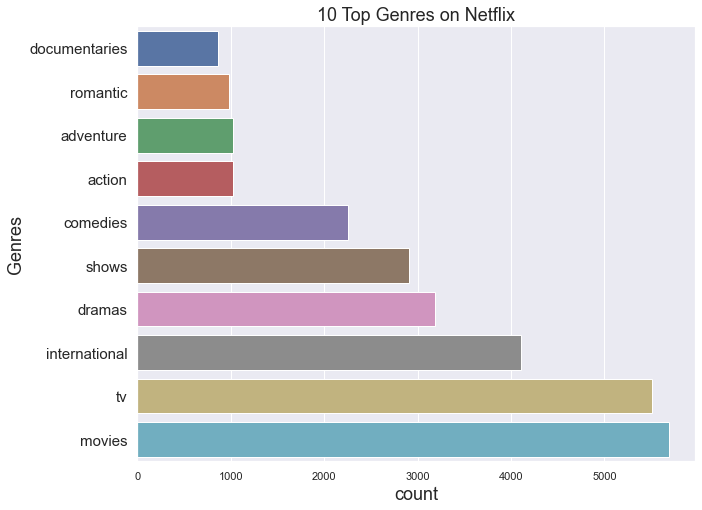

In [188]:
# dict(genres_counts) convert to dictionary
dfg = df_genre.tail(10)
plt.figure(figsize = (10,8))
sns.barplot(data = dfg, y= dfg.index, x='count_genre')
plt.title('10 Top Genres on Netflix', fontsize =18)
plt.xlabel('count', fontsize =18)
plt.ylabel('Genres', fontsize =18)
plt.yticks(fontsize=15)
plt.show()

<Figure size 1080x1080 with 0 Axes>

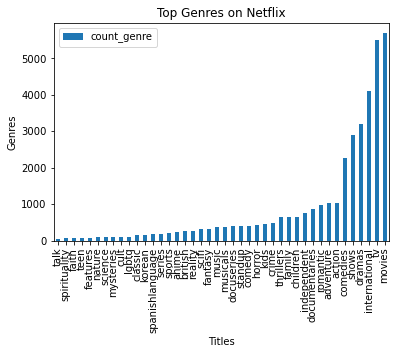

In [30]:
# dict(genres_counts) convert to dictionary
plt.figure(figsize = (15,15) )
df_genre.plot(kind='bar')
plt.title('Top Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [35]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [36]:
count_gen [2:10]

['tv', 'shows', 'tv', 'dramas', 'tv', 'mysteries', 'crime', 'tv']

In [37]:
all_words_joined = ' '.join(count_gen)

In [254]:
def generate_show_wordcloud(tokens):
    plt.figure(figsize = (15, 15), facecolor = None) 
    wordcloud = WordCloud(width = 1600, height = 1000, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(tokens)
    #plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title('Genres analysis', fontsize = 20)
    plt.show()

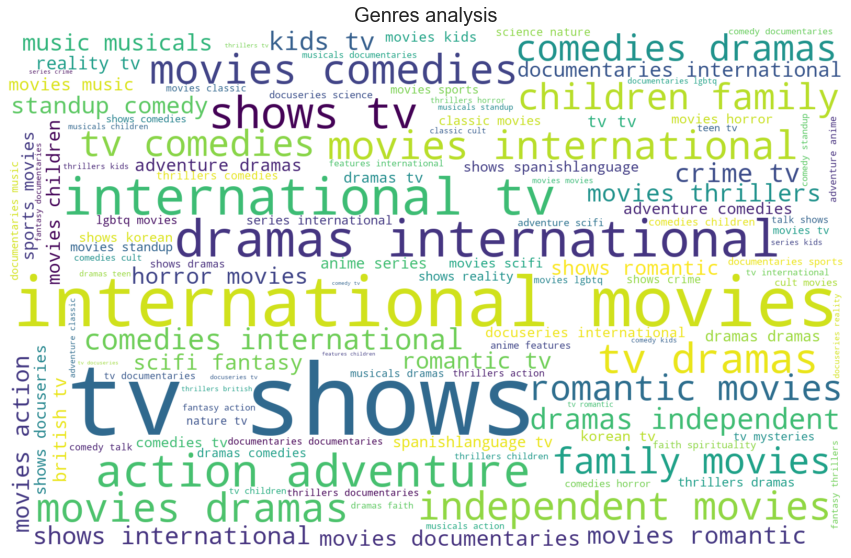

In [255]:
# plot the WordCloud image
generate_show_wordcloud(all_words_joined)

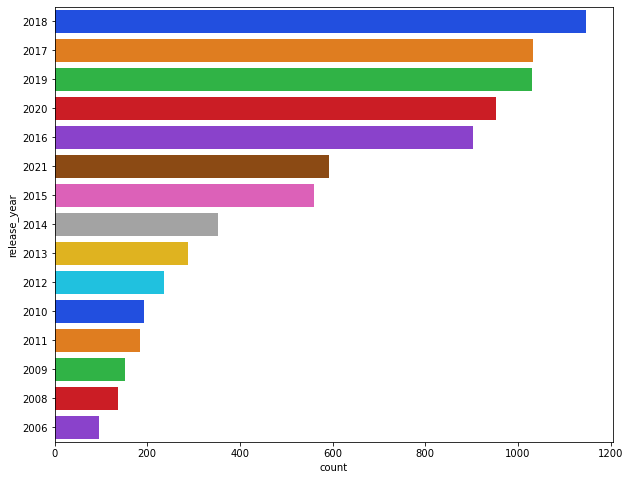

In [40]:
plt.figure(figsize=(10,8))
#sns.set(style="dark")
ax = sns.countplot(y="release_year", data=df, palette="bright", order=df['release_year'].value_counts().index[0:15])

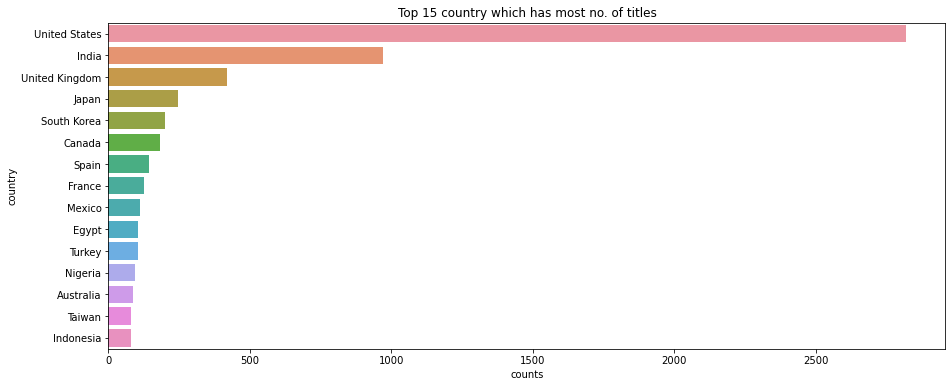

In [41]:
# Country with most numbers of title

plt.figure(figsize=(15,6))
top_countries = df['country'].value_counts().rename_axis('country').reset_index(name = 'counts')[:15]

sns.barplot(data = top_countries, x='counts', y ='country')
plt.title('Top 15 country which has most no. of titles');

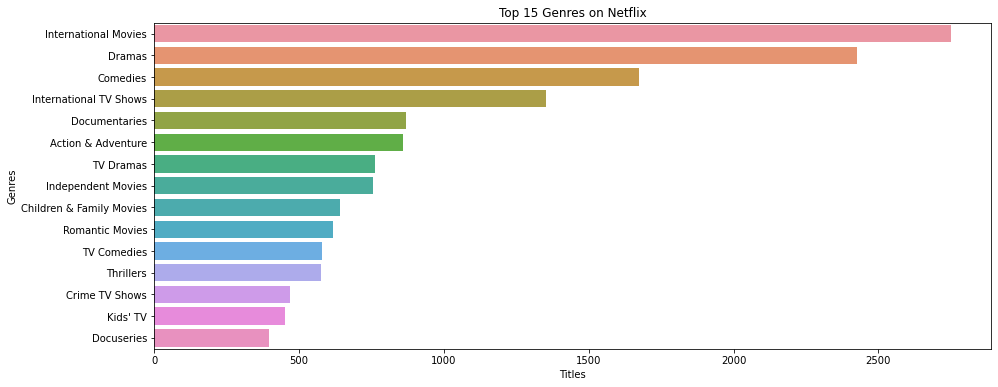

In [42]:
# Top 15 Genres 

filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(15,6))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:15])
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [43]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

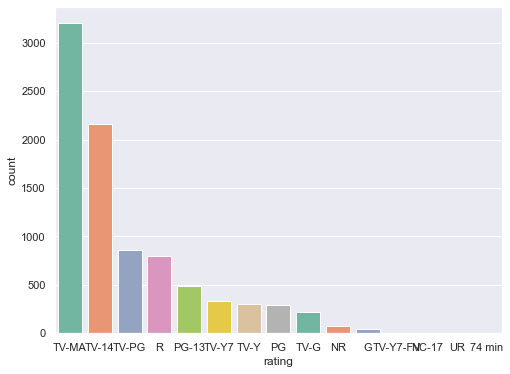

In [44]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette="Set2", order=df['rating'].value_counts().index[0:15])

# RECOMMENDATION SYSTEM

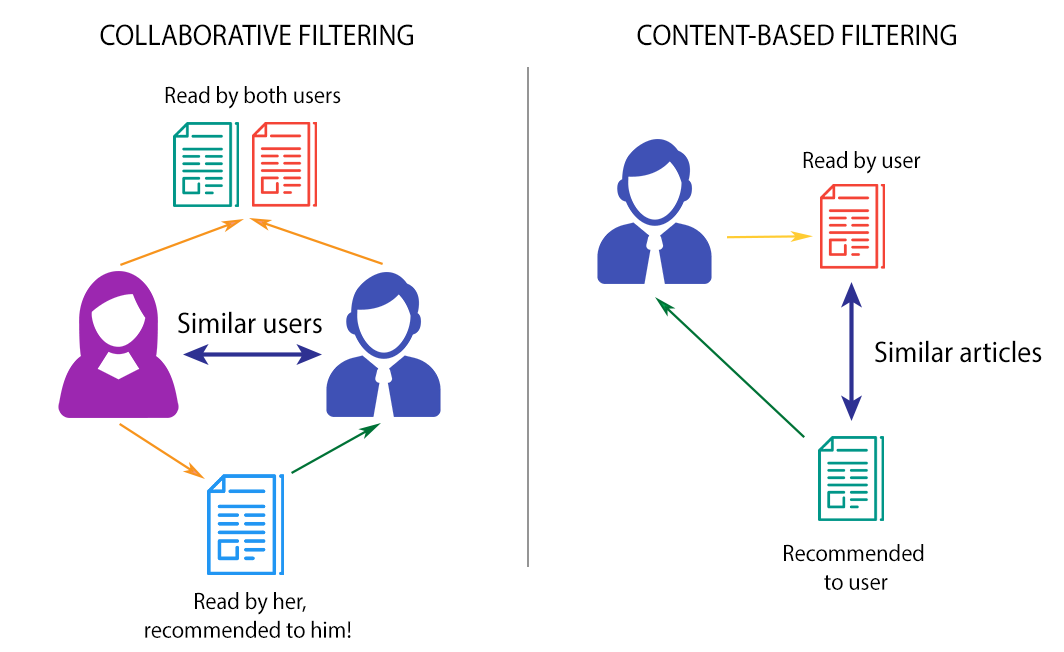

The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

# TfidfVectorizer and recommender system

In [45]:
#from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
df['description'] =df['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(df['description'])
tfidf_matrix.shape

(8807, 18895)

In [46]:
tfidf_matrix

<8807x18895 sparse matrix of type '<class 'numpy.float64'>'
	with 121374 stored elements in Compressed Sparse Row format>

## Cosine similarity score

#The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.
#Cosine similarity is a measure of similarity, often used to measure document similarity in text analysis.

In [47]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [48]:
df.index

RangeIndex(start=0, stop=8807, step=1)

In [49]:
from sklearn.metrics.pairwise import linear_kernel
# Import linear_kernel
# Compute the cosine similarity matrix
# get the indices
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[1:4]

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.02230089],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01638583,
        0.        ]])

In [50]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()
indices

title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Zodiac                   8802
Zombie Dumb              8803
Zombieland               8804
Zoom                     8805
Zubaan                   8806
Length: 8807, dtype: int64

 ## Defining Recommendation System Function

In [51]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [52]:
get_recommendations('Peaky Blinders')

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

In [53]:
get_recommendations('Mortel')

256                       Nneka The Pretty Serpent
3674                  PILI Fantasy: War of Dragons
800                                Mosquita y Mari
4511         Edgar Rice Burroughs' Tarzan and Jane
6749                             Figures of Speech
7535    My Entire High School Sinking Into the Sea
6760                                     FirstBorn
4918                                 Psychokinesis
5481                                     Chamatkar
2190                          The Umbrella Academy
Name: title, dtype: object

## recommendation system, count vectorizer is used instead of tf-idf

In [54]:
missingfilled=df.fillna('')
missingfilled.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [55]:
#Data cleaning. Converting all words to their lower case form
def data_cleaning(x):
        return str.lower(x.replace(" ", ""))

In [56]:
features=['title','director','cast','listed_in','description']
missingfilled=missingfilled[features]

for feature in features:
    missingfilled[feature] = missingfilled[feature].apply(data_cleaning)
    
missingfilled.head(2)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [58]:
def content_compile(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [59]:
missingfilled['soup'] = missingfilled.apply(content_compile, axis=1)

In [60]:
countvec = CountVectorizer(stop_words='english')
countvec_matrix = countvec.fit_transform(missingfilled['soup'])

cosine_sim2 = cosine_similarity(countvec_matrix, countvec_matrix)

In [61]:
missingfilled=missingfilled.reset_index()
indices = pd.Series(missingfilled.index, index=missingfilled['title'])

In [62]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

In [63]:
get_recommendations_new('Dark', cosine_sim2)

260                 The Defeated
3604                    Sintonia
2053             Young Wallander
3744                     Unit 42
5404           The Truth Seekers
6323                 Black Heart
3789              Killer Ratings
4476       Terrorism Close Calls
4673    Inside the Criminal Mind
3855                  The Writer
Name: title, dtype: object

# new exploration 

In [64]:
from nltk.corpus import wordnet
from nltk import pos_tag
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

In [65]:
# Define a function to return the wordnet object value corresponding to the POS tag
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):       
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [66]:
# write a function to clean text    
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text for space and \n
    text = re.split('\s+|\n',text)   
    # remove puncutation
    text = [word.strip(string.punctuation) for word in text]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = set(stopwords.words('english'))
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # create a (word, pos_tag) tuple for each word in text and then lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)

    return(text)

In [67]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [68]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [69]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [70]:
data = df.copy(deep=True)

In [71]:
data = data[['type', 'description']]
data.head(2)

,type,description
0,Movie,"As her father nears the end of his life, filmm..."
1,TV Show,"After crossing paths at a party, a Cape Town t..."


In [72]:
data.isnull().sum()

type           0
description    0
dtype: int64

In [73]:
def clean_text_lem1 (text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    tokens = [t for t in tokens if t.isalpha()] # remove numeric 
    tokens = [word for word in tokens if not any(c.isdigit() for c in word)]                      
    text = [wn.lemmatize(word) for word in tokens if word not in stopword] # stemming
    # remove empty tokens and tokens of 1 letter 
    text = [t for t in text if len(t) > 3]
    # join all
    #text = " ".join(text)
    return text

In [74]:
# call the function to clean text data
data["clean_text"] = data["description"].apply(lambda x: clean_text_lem1(x))
data.head()

,type,description,clean_text
0,Movie,"As her father nears the end of his life, filmm...","[father, nears, life, filmmaker, kirsten, john..."
1,TV Show,"After crossing paths at a party, a Cape Town t...","[crossing, path, party, cape, town, teen, prov..."
2,TV Show,To protect his family from a powerful drug lor...,"[protect, family, powerful, drug, lord, skille..."
3,TV Show,"Feuds, flirtations and toilet talk go down amo...","[feud, flirtation, toilet, talk, among, incarc..."
4,TV Show,In a city of coaching centers known to train I...,"[city, coaching, center, known, train, india, ..."


In [75]:
data['description'][9]

"A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward."

In [76]:
data['clean_text'][9]

['woman',
 'adjusting',
 'life',
 'loss',
 'contends',
 'feisty',
 'bird',
 'thats',
 'taken',
 'garden',
 'husband',
 'struggling',
 'find',
 'forward']

### most common word in each description

In [77]:
# Import Counter
from collections import Counter

# Tokenize the article: tokens

#tokens = word_tokenize(article)
#tokens = data['clean_text'].apply(lambda row:word_tokenize(row))

# Create a Counter with the lowercase tokens: bow_simple
bow_tuple = data['clean_text'].apply(lambda row: Counter(row))

# Print the 10 most common tokens
print(bow_tuple[1].most_common(10))

[('crossing', 1), ('path', 1), ('party', 1), ('cape', 1), ('town', 1), ('teen', 1), ('prove', 1), ('whether', 1), ('privateschool', 1), ('swimming', 1)]


In [203]:
bow_tuple.head(3)

0    {'father': 1, 'nears': 1, 'life': 1, 'filmmake...
1    {'crossing': 1, 'path': 1, 'party': 1, 'cape':...
2    {'protect': 1, 'family': 1, 'powerful': 1, 'dr...
Name: clean_text, dtype: object

In [207]:
count_words=[]

for row in list(data['clean_text']):
    for word in row:
        count_words.append(word)
        
words_counts=Counter(count_words)
print('number of unique word in description is', len (words_counts)) # get all the word use in Genres and count the number 

# Print the 10 most common tokens
print(words_counts.most_common(10))

number of unique word in description is 17343
[('life', 1063), ('young', 728), ('family', 709), ('woman', 661), ('find', 654), ('friend', 626), ('world', 566), ('love', 553), ('take', 512), ('must', 398)]


In [205]:
join_words= ' '.join(count_words)

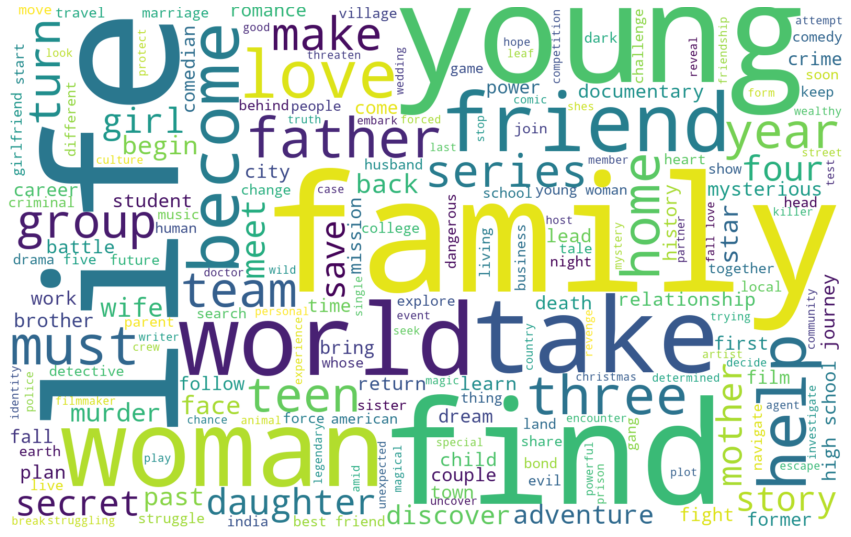

In [206]:
generate_show_wordcloud(join_words)

### 1. Count Vectorizer

In [79]:
data["clean_text2"] = data["description"].apply(lambda x: clean_text(x))
data.head()

,type,description,clean_text,clean_text2
0,Movie,"As her father nears the end of his life, filmm...","[father, nears, life, filmmaker, kirsten, john...",father nears end life filmmaker kirsten johnso...
1,TV Show,"After crossing paths at a party, a Cape Town t...","[crossing, path, party, cape, town, teen, prov...",cross path party cape town teen set prove whet...
2,TV Show,To protect his family from a powerful drug lor...,"[protect, family, powerful, drug, lord, skille...",protect family powerful drug lord skilled thie...
3,TV Show,"Feuds, flirtations and toilet talk go down amo...","[feud, flirtation, toilet, talk, among, incarc...",feuds flirtation toilet talk go among incarcer...
4,TV Show,In a city of coaching centers known to train I...,"[city, coaching, center, known, train, india, ...",city coaching center know train india’s fine c...


In [80]:
# Create a BoW with Count Vectorizer 
def count_vectorizer(data):
    vectorizer = CountVectorizer(ngram_range = (1,2), min_df=10)
    # call `fit` to build the vocabulary
    vectorizer.fit(data)

    # call `transform` to convert text to a bag of words
    count_vectorizer_result  = vectorizer.transform(data)

    #convert to a numpy array to visualize as dataframe
    count_vectorizer_result = count_vectorizer_result.toarray()
    count_vectorizer_features = pd.DataFrame(count_vectorizer_result , columns = vectorizer.get_feature_names())
    count_vectorizer_features.index = data.index
    return count_vectorizer_features

count_vectorizer_df = count_vectorizer(data['clean_text2'])
count_vectorizer_df.shape

(8807, 2644)

In [81]:
data['clean_text2']

0       father nears end life filmmaker kirsten johnso...
1       cross path party cape town teen set prove whet...
2       protect family powerful drug lord skilled thie...
3       feuds flirtation toilet talk go among incarcer...
4       city coaching center know train india’s fine c...
                              ...                        
8802    political cartoonist crime reporter pair cop i...
8803    live alone spooky town young girl befriend mot...
8804    look survive world take zombie dorky college s...
8805    drag civilian life former superhero must train...
8806    scrappy poor boy worm way tycoon's dysfunction...
Name: clean_text2, Length: 8807, dtype: object

In [82]:
count_vectorizer_df.columns

Index(['abandon', 'abduct', 'ability', 'aboard', 'abroad', 'abuse', 'abusive',
       'academy', 'accept', 'access',
       ...
       'young brother', 'young couple', 'young girl', 'young man', 'young men',
       'young son', 'young woman', 'youth', 'zany', 'zombie'],
      dtype='object', length=2644)

#### Count Vectorizer- BOW 


In [89]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(data['clean_text2'])
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(data['clean_text2'])
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

#convert to a numpy array to visualize as dataframe
final_counts = final_counts.toarray()
df_count_bow1 = pd.DataFrame(final_counts , columns = count_vect.get_feature_names())
df_count_bow1.index = data['clean_text2'].index


df_count_bow1.shape

some feature names  ['aaliya', 'aamir', 'aang', 'aardman', 'aaron', 'abad', 'abagnale', 'abah', 'abandon', 'abandoned']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (8807, 15958)
the number of unique words  15958


(8807, 15958)

In [ ]:
df_count_bow1.head(1)

#### Count Vectorizer- Bi-Grams and n-Grams- BOW

In [90]:
#bi-gram, tri-gram and n-gram

#removing stop words like "not" should be avoided before building n-grams
# count_vect = CountVectorizer(ngram_range=(1,2))
# please do read the CountVectorizer documentation 
#http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# you can choose these numebrs min_df=10, max_features=5000, of your choice
count_vect = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
final_bigram_counts = count_vect.fit_transform(data['clean_text2'])
print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

#convert to a numpy array to visualize as dataframe
final_counts = final_bigram_counts.toarray()
df_count_bow2 = pd.DataFrame(final_counts , columns = count_vect.get_feature_names())
df_count_bow2.index = data['clean_text2'].index


df_count_bow2.shape

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (8807, 2644)
the number of unique words including both unigrams and bigrams  2644


(8807, 2644)

### 2. TFIDF

In [91]:
# Create a BoW with TF-IDF Scheme 

def tfidf(data):
    tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2))

    tfidf_result = tfidf.fit_transform(data).toarray()
    tfidf_features = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
    tfidf_features.index = data.index
    return tfidf_features


tfidf_df = tfidf(data['clean_text2'])
tfidf_df.shape

(8807, 5292)

In [92]:
tfidf_df.columns

Index(['aaron', 'abandon', 'abduct', 'abduction', 'ability', 'able', 'aboard',
       'abroad', 'abruptly', 'absence',
       ...
       'youth', 'youtube', 'youtube sensation', 'yu', 'zack', 'zany',
       'zealand', 'zoe', 'zombie', 'zone'],
      dtype='object', length=5292)

#### TFIDF- BOW 

In [94]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(data['clean_text2'])
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(data['clean_text2'])
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

#convert to a numpy array to visualize as dataframe
final_tf_idf = final_bigram_counts.toarray()
df_tdidf_bow2 = pd.DataFrame(final_tf_idf, columns = tf_idf_vect.get_feature_names())
df_tdidf_bow2.index = data['clean_text2'].index


df_tdidf_bow2.shape

some sample features(unique words in the corpus) ['abandon', 'abduct', 'ability', 'aboard', 'abroad', 'abuse', 'abusive', 'academy', 'accept', 'access']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (8807, 2644)
the number of unique words including both unigrams and bigrams  2644


(8807, 2644)

### 3. Word2Vec with TFIDF weighting scheme

In [95]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models.word2vec import Word2Vec

In [96]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [ ]:
from gensim import models
from gensim.models import Word2Vec, KeyedVectors

wv = models.KeyedVectors.load_word2vec_format(
    'GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
#w = models.KeyedVectors.load_word2vec_format('model.bin', binary=True)
#w = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [97]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(data['clean_text2'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [98]:
dictionary['aby']

9.390268497842571

## applied Word2Vec model training

In [84]:
data.head(2)

,type,description,clean_text,clean_text2
0,Movie,"As her father nears the end of his life, filmm...","[father, nears, life, filmmaker, kirsten, john...",father nears end life filmmaker kirsten johnso...
1,TV Show,"After crossing paths at a party, a Cape Town t...","[crossing, path, party, cape, town, teen, prov...",cross path party cape town teen set prove whet...


In [85]:
count_vectorizer_df.shape

(8807, 2644)

In [86]:
df_count_bow1.shape

NameError: name 'df_count_bow1' is not defined

In [99]:
df_count_bow2.shape

(8807, 2644)

In [100]:
tfidf_df.shape

(8807, 5292)

In [101]:
df_tdidf_bow2.shape

(8807, 2644)

# modelling 

# get new features

In [216]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [102]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['description'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['description'].apply(lambda x: count_punct(x))

In [103]:
def clean_text_lem (text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    tokens = [t for t in tokens if t.isalpha()] # remove numeric 
    tokens = [word for word in tokens if not any(c.isdigit() for c in word)]                      
    text = [wn.lemmatize(word) for word in tokens if word not in stopword] # stemming
    # remove empty tokens and tokens of 1 letter 
    text = [t for t in text if len(t) > 2]
    # join all
    text = " ".join(text)
    return text

In [160]:
data['clean_text3']= data['description'].dropna().apply(lambda row: clean_text_lem(row))
data.head(2)

,type,description,clean_text,clean_text2,body_len,punct%,clean_text3
0,Movie,"As her father nears the end of his life, filmm...","[father, nears, life, filmmaker, kirsten, john...",father nears end life filmmaker kirsten johnso...,126,1.6,father nears end life filmmaker kirsten johnso...
1,TV Show,"After crossing paths at a party, a Cape Town t...","[crossing, path, party, cape, town, teen, prov...",cross path party cape town teen set prove whet...,121,2.5,crossing path party cape town teen set prove w...


In [161]:
# split into train and test set

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['clean_text2', 'body_len', 'punct%']], data['type'], test_size=0.2)

## vectorize the data with TFidf and modelling 

In [163]:
tfidf_vect = TfidfVectorizer()
tfidf_vect_fit = tfidf_vect.fit(X_train['clean_text2'])

tfidf_train = tfidf_vect_fit.transform(X_train['clean_text2'])
tfidf_test = tfidf_vect_fit.transform(X_test['clean_text2'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray(), columns = tfidf_vect.get_feature_names())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray(), columns = tfidf_vect.get_feature_names())], axis=1)

X_train_vect.head()

,body_len,punct%,aaliya,aamir,aaron,abad,abagnale,abah,abandon,abandoned,...,zurich,zé,álex,álvaro,ángel,émile,ömer,über,łukasz,şeref
0,103,1.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,125,4.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,126,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,125,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,102,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [221]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)
y_pred1 = rf_model.predict(X_test_vect)

precision, recall, fscore1, train_support = score(y_test, y_pred1, pos_label='Movie', average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred1==y_test).sum()/len(y_pred1), 3)))

print(fscore1)

Precision: 0.768 / Recall: 0.959 / Accuracy: 0.766
0.8532763532763533


In [222]:
target_names = ['Movies', 'TV Show']
print(classification_report(y_test, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

      Movies       0.77      0.96      0.85      1249
     TV Show       0.75      0.30      0.42       513

    accuracy                           0.77      1762
   macro avg       0.76      0.63      0.64      1762
weighted avg       0.76      0.77      0.73      1762



In [224]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

gb_model = gb.fit(X_train_vect, y_train)
y_pred = gb_model.predict(X_test_vect)

precision, recall, fscore2, train_support = score(y_test, y_pred, pos_label='Movie', average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

print(fscore2)

Precision: 0.771 / Recall: 0.927 / Accuracy: 0.754
0.8421818181818183


In [225]:
target_names = ['Movies', 'TV Show']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Movies       0.77      0.93      0.84      1249
     TV Show       0.65      0.33      0.44       513

    accuracy                           0.75      1762
   macro avg       0.71      0.63      0.64      1762
weighted avg       0.74      0.75      0.72      1762



In [229]:
# plot the ROC 
# Compute predicted probabilities: y_pred_prob
y_pred = gb_model.predict(X_test_vect)
y_pred_proba = gb_model.predict_proba(X_test_vect)[:, 1]

# Generate ROC curve values: fpr, tpr, thresholds
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
#plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr, tpr)
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
#plt.show()


In [191]:
from sklearn.metrics import roc_auc_score
#print('ROC score for the model: {}'.format(roc_auc_score(y_test, y_pred)))

In [ ]:
#gb = GradientBoostingClassifier()
#param = {
#    'n_estimators': [100, 150], 
#    'max_depth': [7, 11, 15],
#    'learning_rate': [0.1]
#}

#clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
#cv_fit = clf.fit(X_train_vect, y_train)
#pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

## Building and evaluating a model Naive bayse model

We will use [multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html):

> The multinomial Naive Bayes classifier is suitable for classification with **discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [234]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [235]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_vect, y_train)

Wall time: 1.11 s


MultinomialNB()

In [236]:
# make class predictions for X_test_dtm
y_pred3 = nb.predict(X_test_vect)

In [237]:
precision, recall, fscore, train_support = score(y_test, y_pred3, pos_label='Movie', average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred3==y_test).sum()/len(y_pred3), 3)))

Precision: 0.709 / Recall: 1.0 / Accuracy: 0.709


In [238]:
fscore

0.8296247093988708

In [239]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred3)

0.7088535754824064

In [240]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred3)

array([[1249,    0],
       [ 513,    0]], dtype=int64)

In [241]:
target_names = ['Movies', 'TV Show']
print(classification_report(y_test, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

      Movies       0.71      1.00      0.83      1249
     TV Show       0.00      0.00      0.00       513

    accuracy                           0.71      1762
   macro avg       0.35      0.50      0.41      1762
weighted avg       0.50      0.71      0.59      1762



C:\Users\mirei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mirei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mirei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# vectorized data with countvectorizer and modelling 

In [199]:
#bi-gram, tri-gram and n-gram
count_vect2 = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
bicounts = count_vect2.fit(data['clean_text2'])

count_train = bicounts.transform(X_train['clean_text2'])
count_test = bicounts.transform(X_test['clean_text2'])

X_train_vect2 = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(count_train.toarray(), columns = count_vect.get_feature_names())], axis=1)
X_test_vect2 = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(count_test.toarray(), columns = count_vect.get_feature_names())], axis=1)

X_train_vect2.head()


,body_len,punct%,abandon,abduct,ability,aboard,abroad,abuse,abusive,academy,...,young brother,young couple,young girl,young man,young men,young son,young woman,youth,zany,zombie
0,103,1.9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,125,4.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,126,1.6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,125,1.6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,102,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:

rf2 = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

%time  rf_model2 = rf2.fit(X_train_vect2, y_train)
y_pred2 = rf_model2.predict(X_test_vect2)

precision, recall, fscore, train_support = score(y_test, y_pred2, pos_label='Movie', average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred2==y_test).sum()/len(y_pred2), 3)))

print(fscore)

Wall time: 5.17 s
Precision: 0.764 / Recall: 0.965 / Accuracy: 0.763
0.8524938096922532


In [202]:
gb2 = GradientBoostingClassifier(n_estimators=150, max_depth=11)

%time gb_model2 = gb2.fit(X_train_vect2, y_train)
y_pred2 = gb_model2.predict(X_test_vect2)

precision, recall, fscore, train_support = score(y_test, y_pred2, pos_label='Movie', average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred2==y_test).sum()/len(y_pred2), 3)))

print(fscore)

Wall time: 1min 53s
Precision: 0.766 / Recall: 0.929 / Accuracy: 0.748
0.8393632416787264


In [242]:
nb2 = MultinomialNB()
%time nb2.fit(X_train_vect2, y_train)
y_pred3 = nb2.predict(X_test_vect2)

precision, recall, fscore, train_support = score(y_test, y_pred3, pos_label='Movie', average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred3==y_test).sum()/len(y_pred3), 3)))
print(fscore)

Wall time: 384 ms
Precision: 0.812 / Recall: 0.848 / Accuracy: 0.753
0.8296122209165688


In [214]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [243]:
target_names = ['Movies', 'TV Show']
print(classification_report(y_test, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

      Movies       0.81      0.85      0.83      1249
     TV Show       0.59      0.52      0.55       513

    accuracy                           0.75      1762
   macro avg       0.70      0.69      0.69      1762
weighted avg       0.75      0.75      0.75      1762



# Document Similarity

Document similarity is the process of using a distance or similarity based metric that can be used to identify how similar a text document is with any other document(s) based on features extracted from the documents like bag of words or tf-idf.

Thus you can see that we can build on top of the tf-idf based features we engineered in the previous section and use them to generate new features which can be useful in domains like search engines, document clustering and information retrieval by leveraging these similarity based features.

Pairwise document similarity in a corpus involves computing document similarity for each pair of documents in a corpus. Thus if you have C documents in a corpus, you would end up with a C x C matrix such that each row and column represents the similarity score for a pair of documents, which represent the indices at the row and column, respectively. There are several similarity and distance metrics that are used to compute document similarity. These include cosine distance/similarity, euclidean distance, manhattan distance, BM25 similarity, jaccard distance and so on. In our analysis, we will be using perhaps the most popular and widely used similarity metric,
cosine similarity and compare pairwise document similarity based on their TF-IDF feature vectors.

In [208]:
# Create a BoW with TF-IDF Scheme 

def tfidf(data):
    tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2))

    tfidf_result = tfidf.fit_transform(data).toarray()
    tfidf_features = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
    tfidf_features.index = data.index
    return tfidf_features


tfidf_df2 = tfidf(data['clean_text2'])
tfidf_df2.shape

(8807, 5292)

In [210]:
data[['clean_text2', 'type']].head(2)

,clean_text2,type
0,father nears end life filmmaker kirsten johnso...,Movie
1,cross path party cape town teen set prove whet...,TV Show


In [211]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(data['clean_text2']) # tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab).head(2)

,aaliya,aamir,aang,aardman,aaron,abad,abagnale,abah,abandon,abandoned,...,zé,álex,álvaro,ángel,émile,ömer,über,łukasz,ōarai,şeref
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,8797,8798,8799,8800,8801,8802,8803,8804,8805,8806
0,1.0,0.0,0.0,0.0,0.015004,0.000000,0.000000,0.0,0.03536,0.053075,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.014801,0.077904
1,0.0,1.0,0.0,0.0,0.000000,0.032599,0.048405,0.0,0.00000,0.000000,...,0.032055,0.034255,0.112877,0.0,0.033543,0.0,0.041301,0.043707,0.000000,0.000000
2,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.033582,0.000000,0.022970


Cosine similarity basically gives us a metric representing the cosine of the angle between the feature vector representations of two text documents. Lower the angle between the documents, the closer and more similar they are as depicted in the following figure.

![](https://github.com/dipanjanS/nlp_workshop_odsc19/blob/master/Module04%20-%20Text%20Representation/cosine_depiction.png?raw=1)

Looking closely at the similarity matrix clearly tells us that documents (0, 1 and 6), (2, 5 and 7) are very similar to one another and documents 3 and 4 are slightly similar to each other but the magnitude is not very strong, however still stronger than the other documents. This must indicate these similar documents have some similar features. This is a perfect example of grouping or clustering that can be solved by unsupervised learning especially when you are dealing with huge corpora of millions of text documents.

## Clustering using Document Similarity Features

We will use a very popular partition based clustering method, K-means clustering to cluster or group these documents based on their similarity based feature representations. In K-means clustering, we have an input parameter k, which specifies the number of clusters it will output using the document features. This clustering method is a centroid based clustering method, where it tries to cluster these documents into clusters of equal variance. It tries to create these clusters by minimizing the within-cluster sum of squares measure, also known as inertia. 

In [134]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=0)
km.fit_transform(similarity_matrix)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([data[['clean_text2', 'type']], cluster_labels], axis=1)  # pd.concat([corpus_df, cluster_labels], axis=1)

,clean_text2,type,ClusterLabel
0,father nears end life filmmaker kirsten johnso...,Movie,0
1,cross path party cape town teen set prove whet...,TV Show,0
2,protect family powerful drug lord skilled thie...,TV Show,1
3,feuds flirtation toilet talk go among incarcer...,TV Show,1
4,city coaching center know train india’s fine c...,TV Show,0
...,...,...,...
8802,political cartoonist crime reporter pair cop i...,Movie,1
8803,live alone spooky town young girl befriend mot...,TV Show,0
8804,look survive world take zombie dorky college s...,Movie,1
8805,drag civilian life former superhero must train...,Movie,1


In [135]:
kmdf = pd.concat([data[['clean_text2', 'type']], cluster_labels], axis=1)
kmdf.head(5)

,clean_text2,type,ClusterLabel
0,father nears end life filmmaker kirsten johnso...,Movie,0
1,cross path party cape town teen set prove whet...,TV Show,0
2,protect family powerful drug lord skilled thie...,TV Show,1
3,feuds flirtation toilet talk go among incarcer...,TV Show,1
4,city coaching center know train india’s fine c...,TV Show,0


In [136]:
movie = kmdf[kmdf['type']== 'Movie']
movie.head(2)

,clean_text2,type,ClusterLabel
0,father nears end life filmmaker kirsten johnso...,Movie,0
6,equestria's divide bright-eyed hero believe ea...,Movie,1


In [137]:
# kmean identify movie in cluster 1 
print((movie['ClusterLabel']==0).sum())
print((movie['ClusterLabel']==1).sum())

1990
4141


In [138]:
tvshow = kmdf[kmdf['type']== 'TV Show']
tvshow.head(2)

,clean_text2,type,ClusterLabel
1,cross path party cape town teen set prove whet...,TV Show,0
2,protect family powerful drug lord skilled thie...,TV Show,1


In [139]:
print((tvshow['ClusterLabel']==0).sum())
print((tvshow['ClusterLabel']==1).sum())

746
1930


In [140]:
#classification of movie with Kmean clustering

In [141]:
TP = 4248
TN = 727
FP = 1883
FN = 1849

In [142]:
accuracy_movie = (4248 + 727) / (1883 + 1849 + 727 + 4248) * 100
accuracy_movie

57.13793499483174

The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.
The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

Inertia
Inertia is not a normalized metric.

The lower values of inertia are better and zero is optimal.

But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

We can calculate model inertia as follows:-

In [143]:
km.inertia_

32047.59416212678

In [144]:
y = data['type']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#X['status_type'] = le.fit_transform(X['status_type'])

y = le.fit_transform(y)
y

array([0, 1, 1, ..., 0, 0, 0])

In [145]:
km.labels_

array([0, 0, 1, ..., 1, 1, 0])

In [146]:
labels = km.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 3920 out of 8807 samples were correctly labeled.


In [147]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.45


# Use elbow method to find optimal number of clusters 

In [ ]:
X = pd.DataFrame(np.round(tv_matrix, 2), columns=vocab) # is the tfidf matrix 
#X = tv_matrix
from sklearn.cluster import KMeans
cs = []
for i in range(2, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
    
plt.plot(range(2, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
tv_matrix

In [ ]:
X2 = similarity_matrix
from sklearn.cluster import KMeans
cs = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X2)
    cs.append(kmeans.inertia_)
    
plt.plot(range(2, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X2)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))